# Task 1: YouTube Streamer Analysis




#### Description: This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribers, country, visits, likes, comments, and more. 

#### Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.

In [1]:
#Importing required libraries:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
df=pd.read_csv(r"C:\Users\ANAND\Downloads\Intercareer\youtubers_df.csv")

In [3]:
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


# 1.Data Exploration:

### Shape of dataset

In [4]:
df.shape

(1000, 9)

### Checking for Duplicates

In [5]:
df.duplicated().sum()

0

### Columns names

In [6]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

### Datatype of each Columns

In [7]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

### All information about Dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


### Noise Values

In [9]:
for i in df:
    print(i,df[i].sort_values().unique(),'\n')

Rank [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 

There is no Noise value in given dataset.

### Null Values

In [10]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In Category column there are 306 null values are present.

### Statistical information about all numerical columns

In [11]:
df.describe(include="all")

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
count,1000.000000,1000,694,1.000000e+03,1000,1.000000e+03,1.000000e+03,1000.000000,1000
unique,NaN,994,45,NaN,29,NaN,NaN,NaN,994
top,NaN,NickyJamTV,Música y baile,NaN,Estados Unidos,NaN,NaN,NaN,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,NaN,2,160,NaN,293,NaN,NaN,NaN,2
mean,500.500000,NaN,NaN,2.189440e+07,NaN,1.209446e+06,5.363259e+04,1288.768000,NaN
std,288.819436,NaN,NaN,1.682775e+07,NaN,5.229942e+06,2.580457e+05,6778.188308,NaN
min,1.000000,NaN,NaN,1.170000e+07,NaN,0.000000e+00,0.000000e+00,0.000000,NaN
25%,250.750000,NaN,NaN,1.380000e+07,NaN,3.197500e+04,4.717500e+02,2.000000,NaN
50%,500.500000,NaN,NaN,1.675000e+07,NaN,1.744500e+05,3.500000e+03,67.000000,NaN
75%,750.250000,NaN,NaN,2.370000e+07,NaN,8.654750e+05,2.865000e+04,472.000000,NaN


# Data Cleaning

### Dealing with Null Values

We are going to eliminate columns like the links column since they are not useful to us and we will also replace the null value with an "Unknown" value to work better with the data

In [12]:
df['Categories'].fillna('Unknow', inplace=True)
df.drop(columns=['Links'], inplace=True)

# 2.Trend Analysis:

### - Identify trends among the top YouTube streamers. Which categories are the most popular?
### - Is there a correlation between the number of subscribers and the number of likes or comments?

## Top 10 Categories

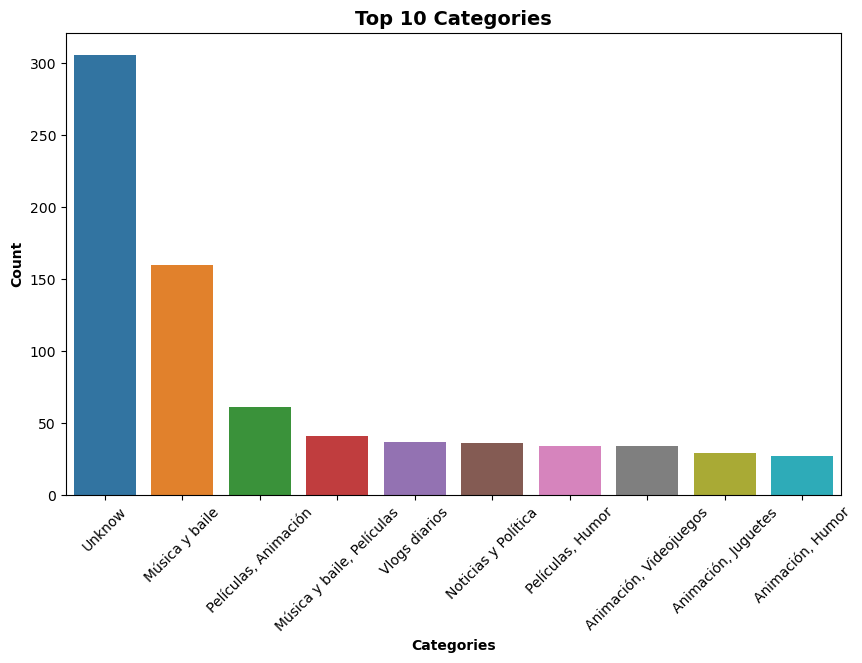

In [13]:
Categories_counts = df['Categories'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=Categories_counts.index, y=Categories_counts.values)
plt.title('Top 10 Categories',color ='black',fontweight='bold',fontsize=14)
plt.xlabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Count',color ='black',fontweight='bold',fontsize=10)
plt.xticks(rotation=45)
plt.show()

### Checking correlation Between the number of  Suscribers and the number of Likes or Comments

In [14]:
corr=df[['Suscribers','Comments','Likes']].corr()
corr

,Suscribers,Comments,Likes
Suscribers,1.000000,0.036350,0.211639
Comments,0.036350,1.000000,0.325911
Likes,0.211639,0.325911,1.000000


### Visualising correlation using heatmap

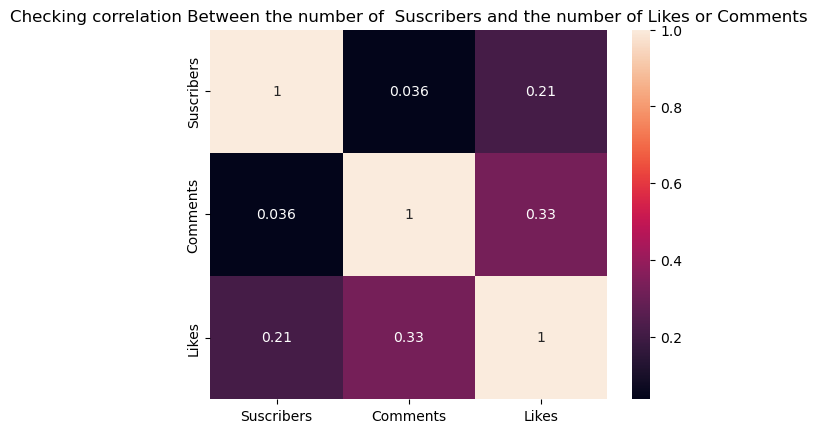

In [15]:
sns.heatmap(corr,annot=True)
plt.title("Checking correlation Between the number of  Suscribers and the number of Likes or Comments")
plt.show()

There is no high correlation between the number of  Suscribers and the number of Likes or Comments

# 3. Audience Study:



### - Analyze the distribution of streamers audiences by country. Are there regional preferences for specific content categories?

#### Distribution of Audience by Country

In [16]:
country_youtubers_count = df["Country"].value_counts().head(10)
country_youtubers_count

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Name: Country, dtype: int64

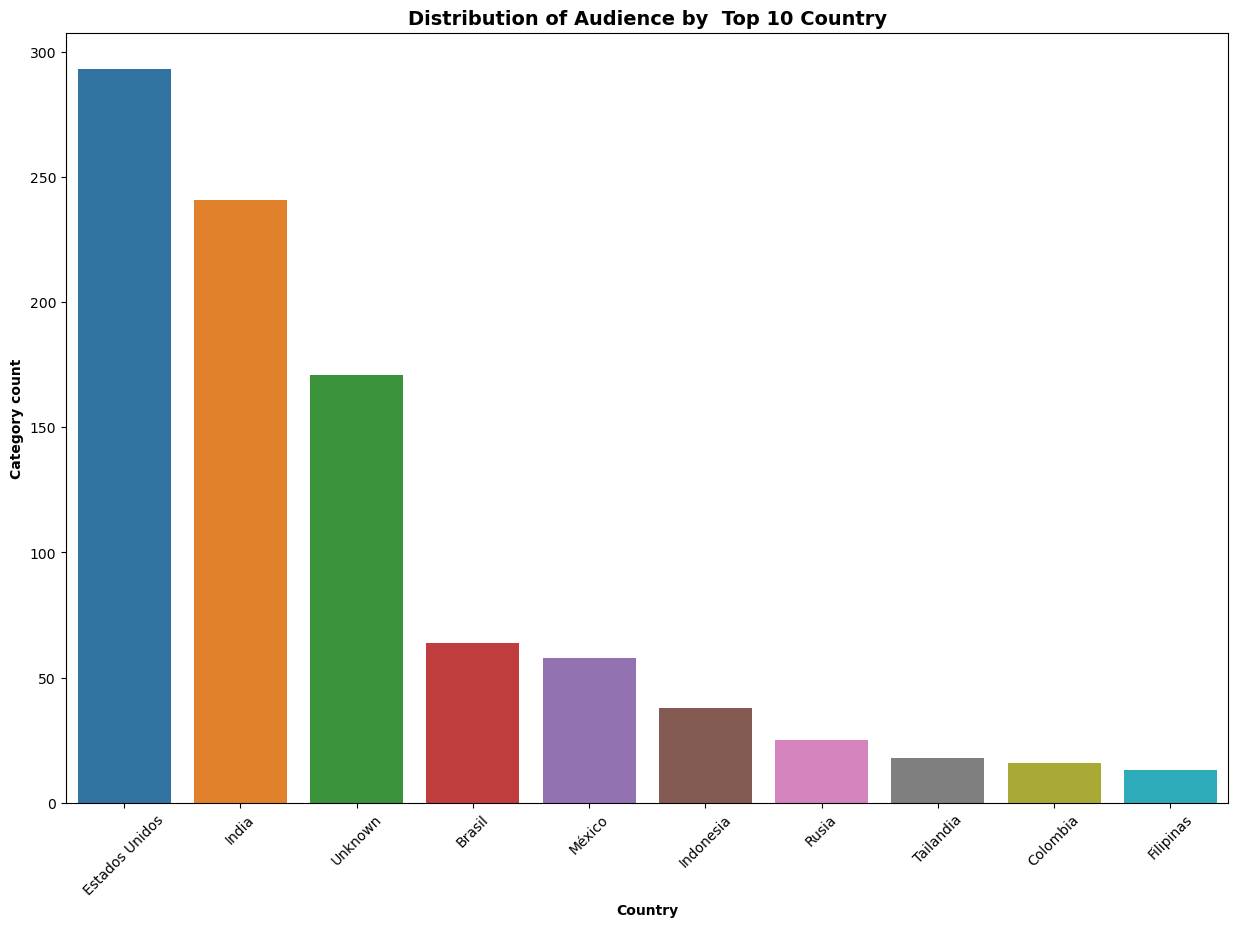

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x=country_youtubers_count.index, y=country_youtubers_count.values)
plt.title('Distribution of Audience by  Top 10 Country',color ='black',fontweight='bold',fontsize=14)
plt.xlabel('Country',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Category count',color ='black',fontweight='bold',fontsize=10)
plt.xticks(rotation=45)
plt.show()

Top most country is : Estados Unidos

## Top Channels by Suscribers

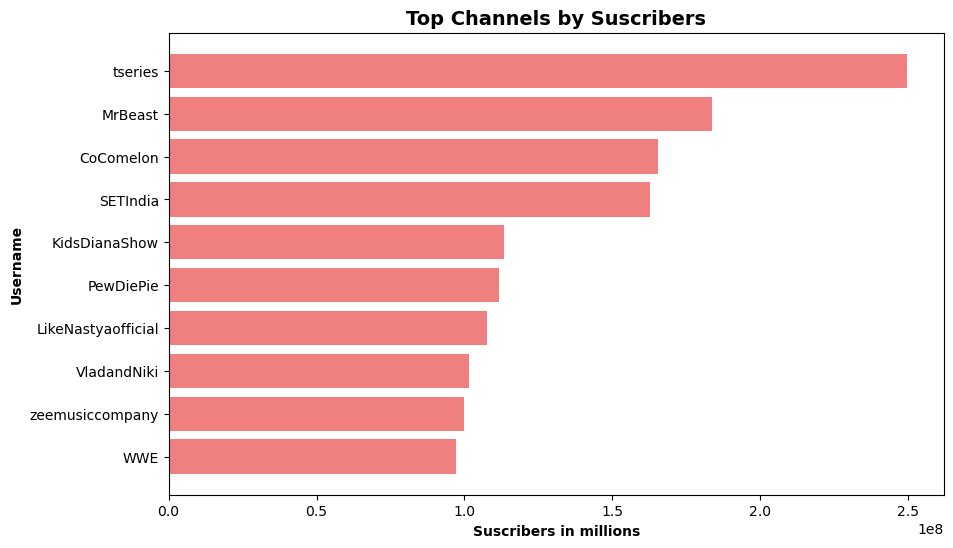

In [18]:
sorted_by_subscribers = df.sort_values(by='Suscribers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(sorted_by_subscribers['Username'], sorted_by_subscribers['Suscribers'], color='lightcoral')
plt.xlabel('Suscribers in millions',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Username',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Channels by Suscribers',color ='black',fontweight='bold',fontsize=14)
plt.gca().invert_yaxis()  
plt.show()

## Top Channels by Views

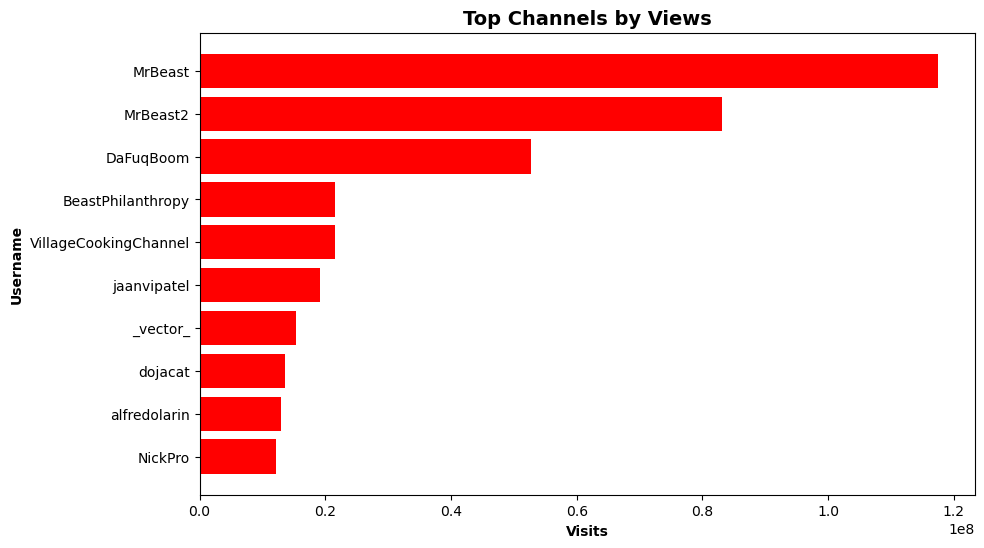

In [19]:
sorted_by_views = df.sort_values(by='Visits', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(sorted_by_views['Username'], sorted_by_views['Visits'], color='red')
plt.xlabel('Visits',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Username',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Channels by Views',color ='black',fontweight='bold',fontsize=14)
plt.gca().invert_yaxis()  
plt.show()

# 4. Performance Matrics:

### - Calculate and visualize the average number of subscribers, visits, likes, and comments.
### - Are there patterns or anomalies in these metrics?

In [20]:
avg_dis=df[['Likes', 'Comments','Suscribers','Visits']].mean()
avg_dis

Likes         5.363259e+04
Comments      1.288768e+03
Suscribers    2.189440e+07
Visits        1.209446e+06
dtype: float64

<Figure size 200x200 with 0 Axes>

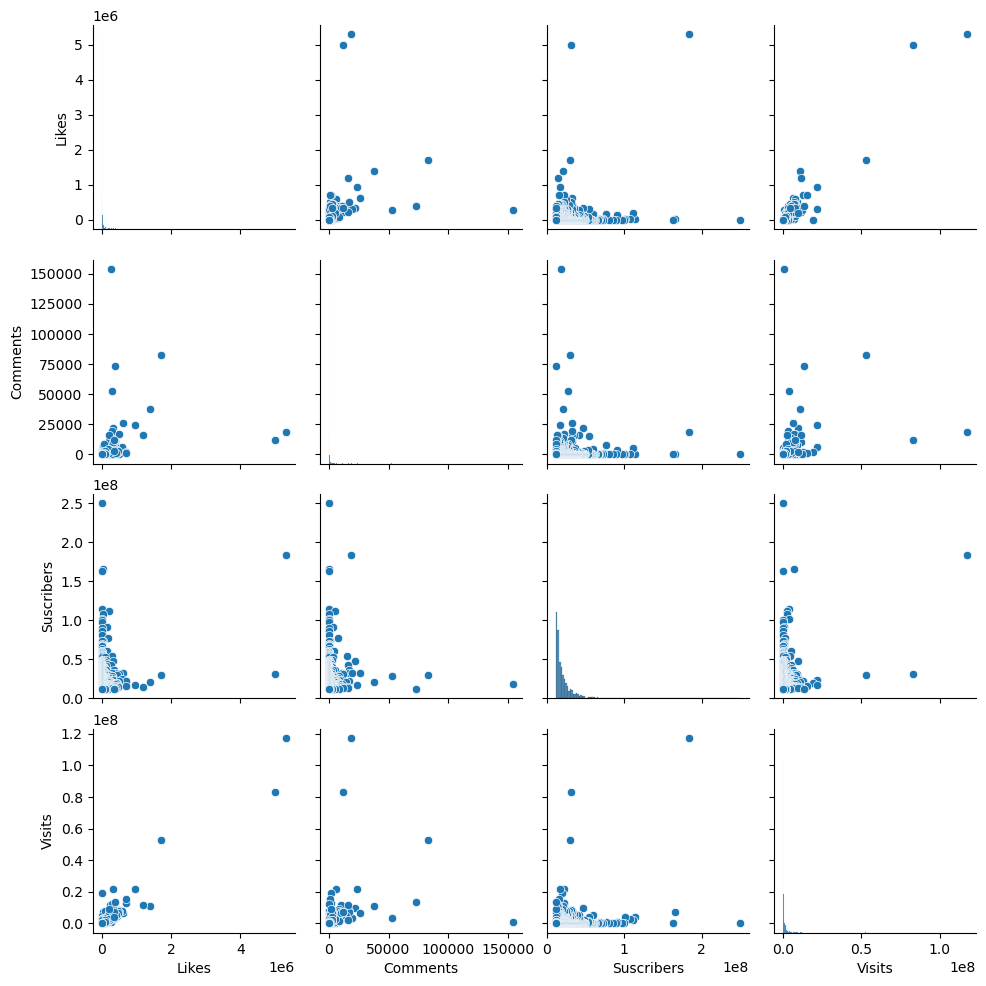

In [21]:
plt.figure(figsize=(2,2))
sns.pairplot(df[['Likes', 'Comments','Suscribers','Visits']])
plt.show()


# 5. Content Categories:



### - Explore the distribution of content categories. Which categories have the highest number of streamers?


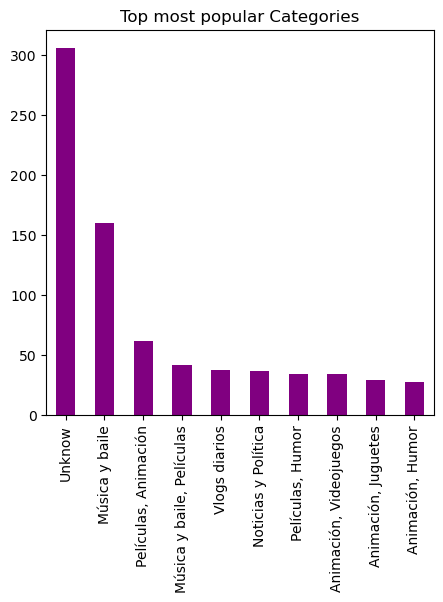

In [22]:
plt.figure(figsize=(5,5))
category_count=df['Categories'].value_counts().head(10)
category_count.plot(kind='bar',color='purple')
plt.title('Top most popular Categories')
plt.show()

### - Are there specific categories with exceptional performance metrics?

In [23]:
# Calculate average Likes,Comments,Subscribers and Visits for each category

category_metrics = df.groupby('Categories')[['Likes', 'Comments','Suscribers','Visits']].mean().reset_index()
category_metrics

,Categories,Likes,Comments,Suscribers,Visits
0,ASMR,4100.000000,148.000000,1.520000e+07,3.685000e+05
1,"ASMR, Comida y bebida",8600.000000,349.000000,1.300000e+07,5.575000e+05
2,Animación,21413.454545,396.636364,1.764091e+07,6.367182e+05
3,"Animación, Humor",145768.333333,5344.962963,2.078519e+07,3.760126e+06
4,"Animación, Humor, Juguetes",37.000000,0.000000,1.390000e+07,8.000000e+03
5,"Animación, Juguetes",2653.068966,0.517241,2.937586e+07,5.254483e+05
6,"Animación, Videojuegos",79294.029412,3786.617647,1.939412e+07,1.200059e+06
7,Animales y mascotas,102750.000000,2806.000000,1.560000e+07,2.231450e+06
8,"Belleza, Moda",62300.000000,1100.000000,2.390000e+07,9.645000e+05
9,Ciencia y tecnología,59283.142857,1363.571429,1.726429e+07,8.871286e+05


## Top Categories by Likes:

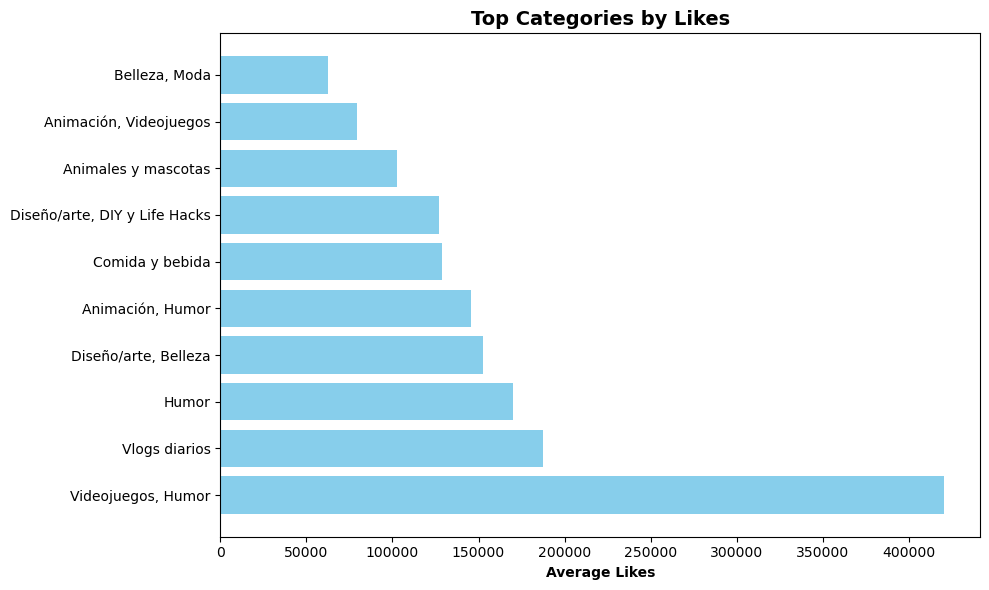

In [24]:
# Sort categories by Likes in descending order to find the top-performing categories
category_metrics = category_metrics.sort_values(by='Likes', ascending=False)
# Top 10 categories based on Likes
top_categories_likes = category_metrics.head(10)



# Plot Top 10 Categories by Likes
plt.figure(figsize=(10, 6))
plt.barh(top_categories_likes['Categories'], top_categories_likes['Likes'], color='skyblue')
plt.xlabel('Average Likes',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Categories by Likes',color ='black',fontweight='bold',fontsize=14)


plt.tight_layout()
plt.show()

## Top Categories by Comments:

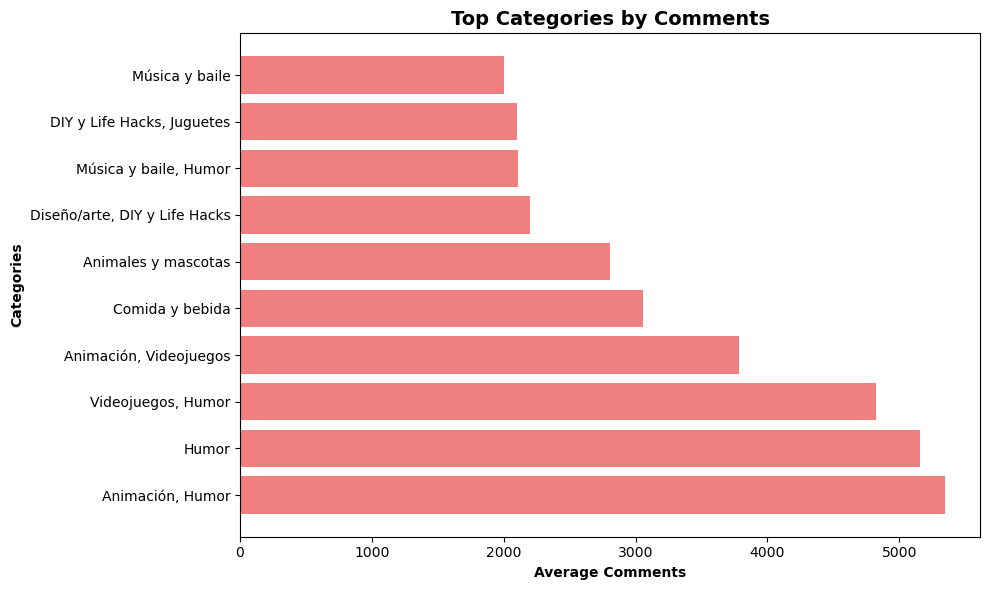

In [25]:
# Sort categories by Comments in descending order to find the top-performing categories
category_metrics = category_metrics.sort_values(by='Comments', ascending=False)
# Top 10 categories based on Comments
top_categories_comments = category_metrics.head(10)



# Plot Top 10 Categories by Comments
plt.figure(figsize=(10, 6))
plt.barh(top_categories_comments['Categories'], top_categories_comments['Comments'], color='lightcoral')
plt.xlabel('Average Comments',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Categories by Comments',color ='black',fontweight='bold',fontsize=14)



plt.tight_layout()
plt.show()

## Top Categories by Suscribers:

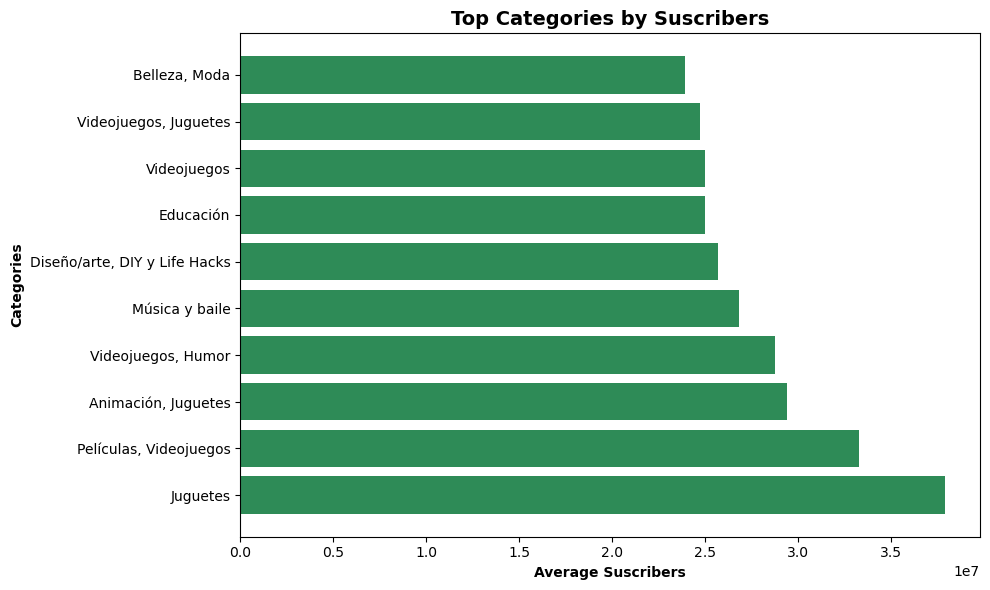

In [26]:
# Sort categories by Comments in descending order to find the top-performing categories
category_metrics = category_metrics.sort_values(by='Suscribers', ascending=False)
# Top 10 categories based on Comments
top_categories_comments = category_metrics.head(10)



# Plot Top 10 Categories by Comments
plt.figure(figsize=(10, 6))
plt.barh(top_categories_comments['Categories'], top_categories_comments['Suscribers'], color='seagreen')
plt.xlabel('Average Suscribers',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Categories by Suscribers',color ='black',fontweight='bold',fontsize=14)



plt.tight_layout()
plt.show()

## Top Categories by Visits:

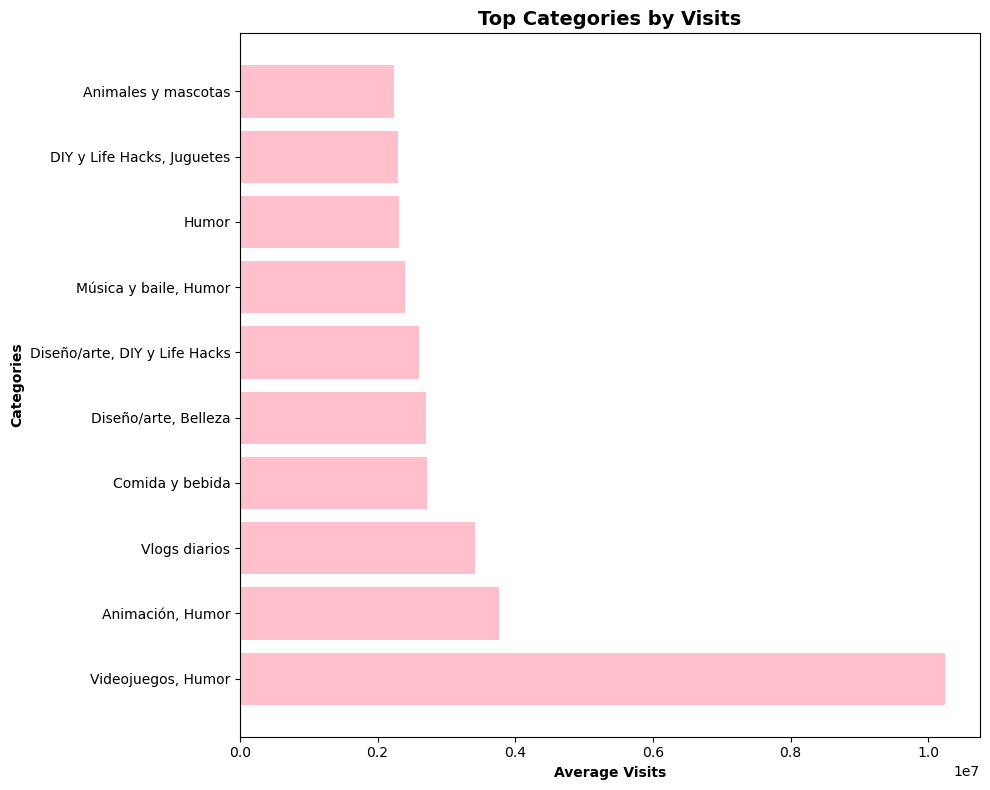

In [27]:
# Sort categories by Comments in descending order to find the top-performing categories
category_metrics = category_metrics.sort_values(by='Visits', ascending=False)
# Top 10 categories based on Comments
top_categories_comments = category_metrics.head(10)


# Plot Top 10 Categories by Comments
plt.figure(figsize=(10, 8))
plt.barh(top_categories_comments['Categories'], top_categories_comments['Visits'], color='pink')
plt.xlabel('Average Visits',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Categories by Visits',color ='black',fontweight='bold',fontsize=14)

plt.tight_layout()
plt.show()

# 6. Brands and Collaborations:



### - Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

In [28]:
df['High Performance']=df['Likes']+df['Comments']+df['Suscribers']+df['Visits']
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,High Performance
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,249588978.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,306218500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,172524700.0
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0,162615775.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,117412400.0


### Visualize the relationship between performance and No. of Likes:

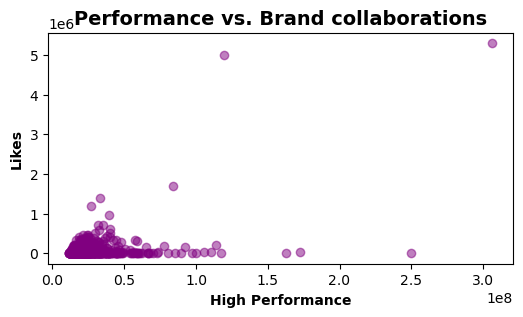

In [29]:
plt.figure(figsize=(6,3))
plt.scatter(df['High Performance'], df['Likes'],alpha=0.5, color='purple')
plt.xlabel('High Performance',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Likes',color ='black',fontweight='bold',fontsize=10)
plt.title('Performance vs. Brand collaborations',color ='black',fontweight='bold',fontsize=14)
plt.show()

### Visualize the relationship between performance and No. of Comments:

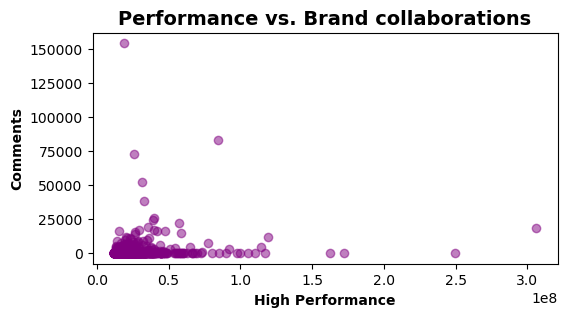

In [30]:
plt.figure(figsize=(6,3))
plt.scatter(df['High Performance'], df['Comments'],alpha=0.5, color='purple')
plt.xlabel('High Performance',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Comments',color ='black',fontweight='bold',fontsize=10)
plt.title('Performance vs. Brand collaborations',color ='black',fontweight='bold',fontsize=14)
plt.show()

In [31]:
### Visualize the relationship between performance and No. of Suscribers:

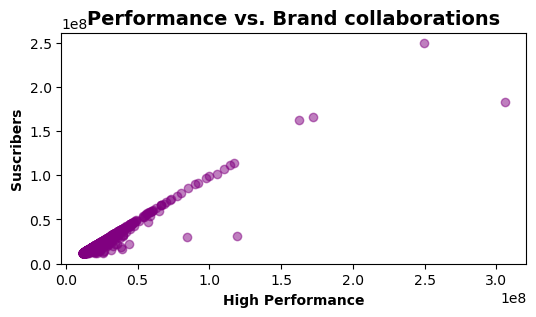

In [32]:
plt.figure(figsize=(6,3))
plt.scatter(df['High Performance'], df['Suscribers'],alpha=0.5, color='purple')
plt.xlabel('High Performance',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Suscribers',color ='black',fontweight='bold',fontsize=10)
plt.title('Performance vs. Brand collaborations',color ='black',fontweight='bold',fontsize=14)
plt.show()

### Visualize the relationship between performance and No. of Visits:

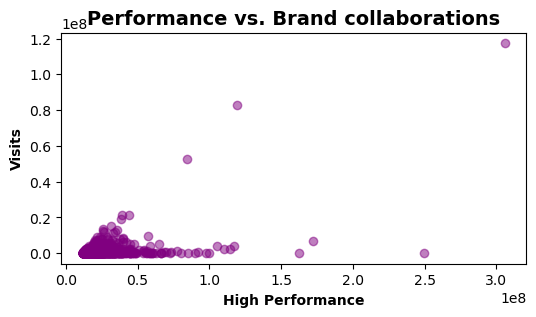

In [33]:
plt.figure(figsize=(6,3))
plt.scatter(df['High Performance'], df['Visits'],alpha=0.5, color='purple')
plt.xlabel('High Performance',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Visits',color ='black',fontweight='bold',fontsize=10)
plt.title('Performance vs. Brand collaborations',color ='black',fontweight='bold',fontsize=14)
plt.show()

# 7.Benchmarking:

### - Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
### - Who are the top-performing content creators?

In [34]:
avg_=df[['Likes', 'Comments','Suscribers','Visits']].mean()
avg_
            

Likes         5.363259e+04
Comments      1.288768e+03
Suscribers    2.189440e+07
Visits        1.209446e+06
dtype: float64

### Above Average Category by Likes:

In [35]:
a=df[['Categories','Likes']].groupby("Categories")['Likes'].mean().reset_index()
a

,Categories,Likes
0,ASMR,4100.000000
1,"ASMR, Comida y bebida",8600.000000
2,Animación,21413.454545
3,"Animación, Humor",145768.333333
4,"Animación, Humor, Juguetes",37.000000
5,"Animación, Juguetes",2653.068966
6,"Animación, Videojuegos",79294.029412
7,Animales y mascotas,102750.000000
8,"Belleza, Moda",62300.000000
9,Ciencia y tecnología,59283.142857


### Top Content Creators With Respect to Likes

In [47]:
above_avg_Likes=a[a['Likes']>avg_['Likes']][['Categories','Likes']]
above_avg_Likes

,Categories,Likes
3,"Animación, Humor",145768.333333
6,"Animación, Videojuegos",79294.029412
7,Animales y mascotas,102750.000000
8,"Belleza, Moda",62300.000000
9,Ciencia y tecnología,59283.142857
11,Comida y bebida,128664.750000
18,"Diseño/arte, Belleza",152400.000000
19,"Diseño/arte, DIY y Life Hacks",127300.000000
24,Humor,169990.000000
40,Unknow,53993.186275


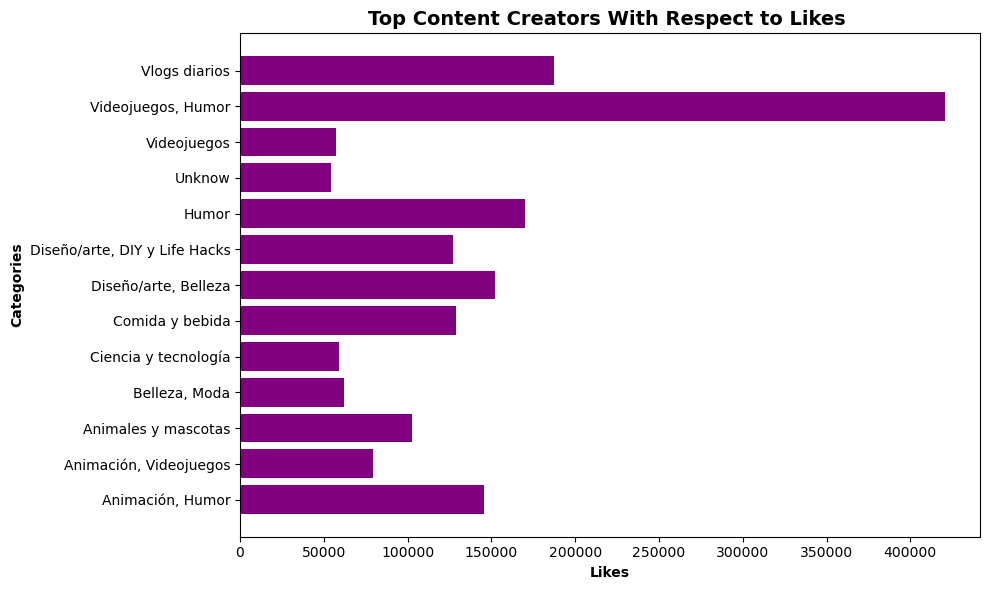

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(above_avg_Likes['Categories'], above_avg_Likes['Likes'], color = 'purple')
plt.xlabel('Likes',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Content Creators With Respect to Likes ',color ='black',fontweight='bold',fontsize=14)


plt.tight_layout()
plt.show()

### Above Average Category by Comments:

In [49]:
b=df[['Categories','Comments']].groupby("Categories")['Comments'].mean().reset_index()
b

,Categories,Comments
0,ASMR,148.000000
1,"ASMR, Comida y bebida",349.000000
2,Animación,396.636364
3,"Animación, Humor",5344.962963
4,"Animación, Humor, Juguetes",0.000000
5,"Animación, Juguetes",0.517241
6,"Animación, Videojuegos",3786.617647
7,Animales y mascotas,2806.000000
8,"Belleza, Moda",1100.000000
9,Ciencia y tecnología,1363.571429


### Top Content Creators With Respect to Comments

In [50]:
above_avg_Comments=b[b['Comments']>avg_['Comments']][['Categories','Comments']]
above_avg_Comments

,Categories,Comments
3,"Animación, Humor",5344.962963
6,"Animación, Videojuegos",3786.617647
7,Animales y mascotas,2806.000000
9,Ciencia y tecnología,1363.571429
11,Comida y bebida,3053.416667
15,"DIY y Life Hacks, Juguetes",2100.000000
19,"Diseño/arte, DIY y Life Hacks",2200.000000
20,Educación,1537.250000
24,Humor,5159.800000
29,Música y baile,1998.931250


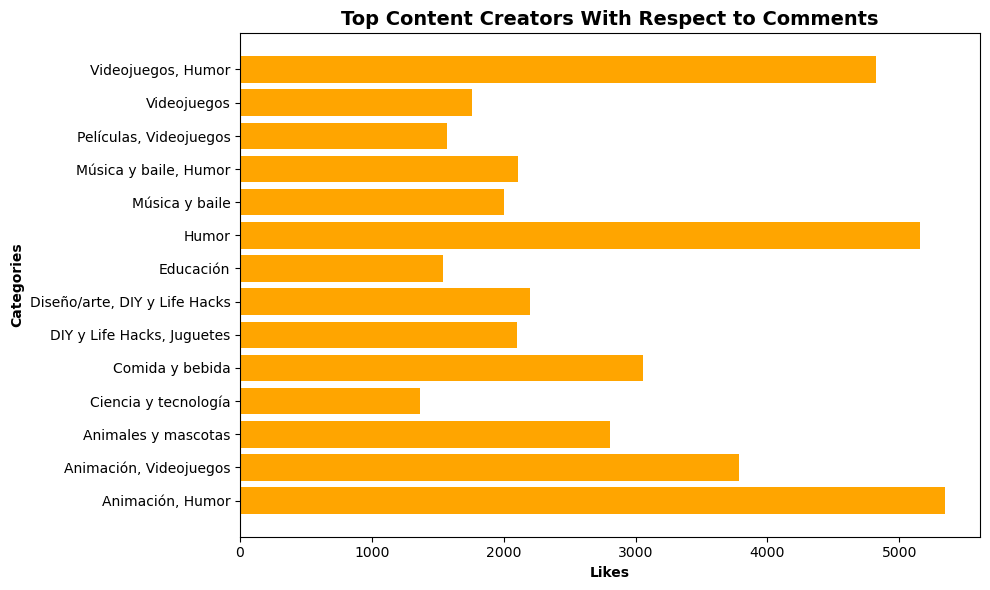

In [51]:
plt.figure(figsize=(10, 6))
plt.barh(above_avg_Comments['Categories'], above_avg_Comments['Comments'], color='orange')
plt.xlabel('Likes',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Content Creators With Respect to Comments',color ='black',fontweight='bold',fontsize=14)


plt.tight_layout()
plt.show()

### Above Average Category by Suscribers:

In [52]:
c=df[['Categories','Suscribers']].groupby("Categories")['Suscribers'].mean().reset_index()
c

,Categories,Suscribers
0,ASMR,1.520000e+07
1,"ASMR, Comida y bebida",1.300000e+07
2,Animación,1.764091e+07
3,"Animación, Humor",2.078519e+07
4,"Animación, Humor, Juguetes",1.390000e+07
5,"Animación, Juguetes",2.937586e+07
6,"Animación, Videojuegos",1.939412e+07
7,Animales y mascotas,1.560000e+07
8,"Belleza, Moda",2.390000e+07
9,Ciencia y tecnología,1.726429e+07


### Top Content Creators With Respect to Suscribers

In [53]:
above_avg_Suscribers=c[c['Suscribers']>avg_['Suscribers']][['Categories','Suscribers']]
above_avg_Suscribers

,Categories,Suscribers
5,"Animación, Juguetes",2.937586e+07
8,"Belleza, Moda",2.390000e+07
19,"Diseño/arte, DIY y Life Hacks",2.570000e+07
20,Educación,2.501250e+07
25,Juguetes,3.788000e+07
29,Música y baile,2.683688e+07
36,"Películas, Animación",2.269344e+07
39,"Películas, Videojuegos",3.325000e+07
42,Videojuegos,2.498421e+07
43,"Videojuegos, Humor",2.876471e+07


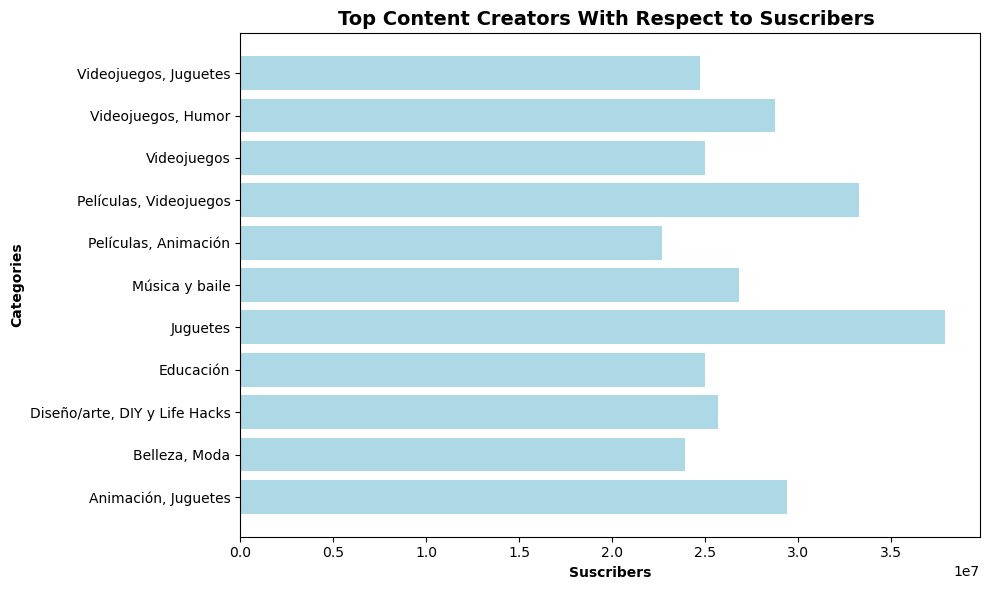

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(above_avg_Suscribers['Categories'], above_avg_Suscribers['Suscribers'], color='lightblue')
plt.xlabel('Suscribers',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Content Creators With Respect to Suscribers ',color ='black',fontweight='bold',fontsize=14)


plt.tight_layout()
plt.show()

### Above Average Category by Visits:

In [55]:
d=df[['Categories','Visits']].groupby("Categories")['Visits'].mean().reset_index()
d

,Categories,Visits
0,ASMR,3.685000e+05
1,"ASMR, Comida y bebida",5.575000e+05
2,Animación,6.367182e+05
3,"Animación, Humor",3.760126e+06
4,"Animación, Humor, Juguetes",8.000000e+03
5,"Animación, Juguetes",5.254483e+05
6,"Animación, Videojuegos",1.200059e+06
7,Animales y mascotas,2.231450e+06
8,"Belleza, Moda",9.645000e+05
9,Ciencia y tecnología,8.871286e+05


### Top Content Creators With Respect to Visits

In [56]:
above_avg_Visits=d[d['Visits']>avg_['Visits']][['Categories','Visits']]
above_avg_Visits

,Categories,Visits
3,"Animación, Humor",3.760126e+06
7,Animales y mascotas,2.231450e+06
11,Comida y bebida,2.722450e+06
15,"DIY y Life Hacks, Juguetes",2.300000e+06
16,Deportes,1.759525e+06
18,"Diseño/arte, Belleza",2.700000e+06
19,"Diseño/arte, DIY y Life Hacks",2.600000e+06
24,Humor,2.310400e+06
31,"Música y baile, Humor",2.402933e+06
42,Videojuegos,1.387137e+06


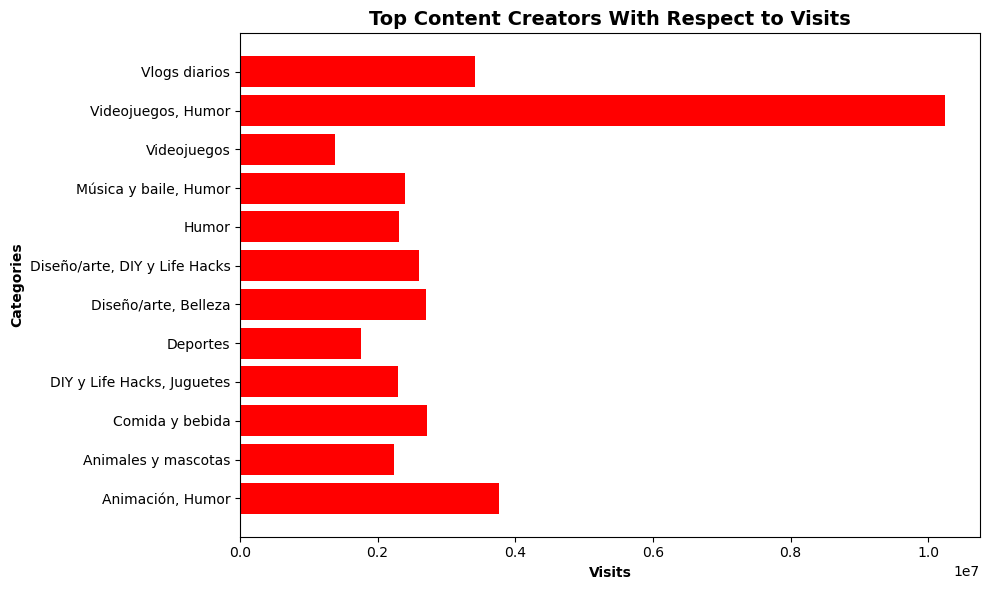

In [57]:
plt.figure(figsize=(10, 6))
plt.barh(above_avg_Visits['Categories'], above_avg_Visits['Visits'], color='red')
plt.xlabel('Visits',color ='black',fontweight='bold',fontsize=10)
plt.ylabel('Categories',color ='black',fontweight='bold',fontsize=10)
plt.title('Top Content Creators With Respect to Visits',color ='black',fontweight='bold',fontsize=14)


plt.tight_layout()
plt.show()

# Thank you!